# Neural Learning - implementing elements of neural networks

_Last revision: Fri Jul  5 18:59:30 AEST 2019_

## Introduction

In this lab we will expand on some of the concepts of neural learning, starting with the perceptron. Initially we understand the representational capacity of a perceptron, then how to implement learning for elementary Boolean functions, i.e., concept learning, and look at a perceptron learning a linear classifier on a real-world dataset.

The remainder of the lab goes into some "hands-on" aspects of supervised learning for neural networks, based on the multi-layer perceptron trained by error back-propagation. 
There are only questions as such in the first section, a review of perceptrons. For the second part on the multi-layer perceprton you are just supposed to step through the cells, running the code, understanding why it is doing what it does, and possibly adding your own cells to experiment.

This code is for explanatory purposes only – for real neural networks you would use one of the many code libraries that exist. 

**Note: this notebook has only been tested using Python 3.**


### Acknowledgement

The perceptron implementation for this lab is based on the presentation and code in Chapter 3 of "Machine Learning" by Stephen Marsland, CRC Press, 2015. 

The multi-layer perceptron part of the lab is based on the presentation and code accompanying Chapter 18 of "Data Science from Scratch" by Joel Grus, O'Reilly Media, 2015 (all the code for the book is available [here](http://github.com/joelgrus/data-science-from-scratch)).

## (1) Linear classification with the Perceptron

### Getting started

In this lab we will use a slight variant on the notation and setup
used in the lectures.
These changes are not going to affect the capabilities of the perceptron.

For a given set of $m$ inputs, the first stage of the computation is when the perceptron  multiplies each of the input values with its corresponding weight and adds these together:

$$ h = \sum_{i}^{m} w_{i} x_{i} $$

The second stage is to apply the thresholding output rule or activation function of the perceptron to produce the classification output.

For this lab we will slightly change the activation function to map to either $0$ or $1$ rather than the $-1$ or $+1$ we had in the lecture notes.

The value set for the bias or threshold input will also be changed from $1$ to $-1$.

$$ o = g(h) = \left\{
                \begin{array}{lll}
                        1 & \mbox{if}           & h > 0 \\
                        0 & \mbox{otherwise if} & h \leq 0 \\
                \end{array}
              \right. $$

Let's go ahead and implement a Perceptron in Python.

## Representing simple Boolean functions as a linear classifier

We will first look at modelling a simple two-input Boolean function as linear classifier. This is a Perceptron WITHOUT any learning! To get started we will use the OR function, for which the truth table will be familiar to you all. Note that you will need to pick some weights for the function to output the correct values given the input. There are many possible values that could do the job. Also, remember to take care with the dimension of the weight vector.

In [1]:
# set up the data, i.e., all the cases in the truth table 
x=[[0,0],[0,1],[1,0],[1,1]]
y=[0,1,1,1]
# number of data points
n=4
# number of inputs to the perceptron
m=3
# what weights should be assigned to correctly compute the OR function ?
w=[0.02,0.03,0.03]
# loop over the data
for i in range(n):
    h=w[0]*(-1)# this is the bias weight and input
    for j in range(1,m):
        # print('J is ', j)
        # print('Data is ', x[i][j-1])
        h+=w[j]*x[i][j-1]
        # print('H is ', h)
    if(h>0):
        output=1
    else:
        output=0
    print('For Input', x[i], 'with Class', y[i], 'Predict ', output)

For Input [0, 0] with Class 0 Predict  0
For Input [0, 1] with Class 1 Predict  1
For Input [1, 0] with Class 1 Predict  1
For Input [1, 1] with Class 1 Predict  1


Now change your code to model the AND function (again restricted to two inputs).

In [43]:
# set up the data, i.e., all the cases in the truth table 
x=[[0,0],[0,1],[1,0],[1,1]]
y=[0,0,0,1]
# number of data points
n=4
# number of inputs to the perceptron
m=3
# what weights should be assigned to correctly compute the AND function ?
w=[0.05,0.03,0.03]
# loop over the data
for i in range(n):
    h=w[0]*(-1)# this is the bias weight and input
    for j in range(1,m):
        h+=w[j]*x[i][j-1]
    if(h>0):
        output=1
    else:
        output=0
    print('For Input', x[i], 'with Class', y[i], 'Predict ', output)

For Input [0, 0] with Class 0 Predict  0
For Input [0, 1] with Class 0 Predict  0
For Input [1, 0] with Class 0 Predict  0
For Input [1, 1] with Class 1 Predict  1


## Changing the data structures for machine learning

We got right down to the details of how a linear classifier works. Now this being a perceptron, you probably recall that rather than using a fixed set of weights to do the prediction each time, there is a simple training rule that updates the weights on the basis of discrepancies between the classifier's prediction on the data and the actual class. So we could extend our previous code to implement that training rule, but the code is a little fiddly and you're probably thinking there should be a simpler way to do this. If so, you are correct, but it is based on moving towards coding with matrix and vector operations, rather than directly using Python arrays. To do this we need to import the NumPy library (there is a tutorial at: <href <a>https://docs.scipy.org/doc/numpy-dev/user/quickstart.html</a>>).

For example, when we need to predict a class for an instance $\mathbf{x}$ given the current weights $\mathbf{w}$ we can use the inner product operation $\mathbf{x} \cdot \mathbf{w}$. To get this functionality using NumPy we just do the following:

In [44]:
import numpy as np

x=np.array([0,1,1])
w=np.array([0.02,0.03,0.03])

h=np.dot(x,w)
print(h)

0.06


But wait, there's more! Since $\mathbf{x}$ and $\mathbf{w}$ are both actually matrices, the same operation will enable us to apply the inner product of the weight vector $\mathbf{w}$ to ALL the data instances at once. In this case we write the matrix of data instances $\mathbf{X}$. Just note that we need to take care that the data matrix and weight vector are properly initialised to make this operation work correctly. Now the code for predicting the class values of all of our data given the weight vector is as follows: 

In [45]:
import numpy as np

# Data set with class values in last column
dataset = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]]) # OR function
X=dataset[:,0:2]
y = dataset[:,2:]
# Note: the bias weight is now the last!
w = np.array([[0.03],[0.03],[0.02]])
# Add the values for the bias weights (-1) to the data matrix
nData = np.shape(X)[0]
X = np.concatenate((X,-np.ones((nData,1))),axis=1)
# get the value of the activation function
h = np.dot(X,w)
yhat = np.where(h>0,1,0)
err = yhat-y

print('Activations:\n', h)
print('Predictions:\n', yhat)
print('Misclassifications\n', err)

Activations:
 [[-0.02]
 [ 0.01]
 [ 0.01]
 [ 0.04]]
Predictions:
 [[0]
 [1]
 [1]
 [1]]
Misclassifications
 [[0]
 [0]
 [0]
 [0]]


This code uses some more NumPy built-ins. Check the documentation to be sure you know what is going on. One of these, np.where(), is useful here. It takes 3 arguments and returns an array. The first argument is a predicate on an array that is either evaluates to true, returning the second argument at the corresponding index in the array or false, returning the third argument instead. Now see how you get on re-implementing the code to do the prediction for the two-input Boolean AND function, as above.

In [46]:
import numpy as np

# Data set with class values in last column
dataset = np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,1]]) # AND function
X=dataset[:,0:2]
y = dataset[:,2:]
# Note: the bias weight is now the last!
w = np.array([[0.03],[0.03],[0.05]])
# Add the values for the bias weights (-1) to the data matrix
nData = np.shape(X)[0]
X = np.concatenate((X,-np.ones((nData,1))),axis=1)
# get the value of the activation function
h = np.dot(X,w)
yhat = np.where(h>0,1,0)
err = yhat-y

print('Activations:\n', h)
print('Predictions:\n', yhat)
print('Misclassifications\n', err)

Activations:
 [[-0.05]
 [-0.02]
 [-0.02]
 [ 0.01]]
Predictions:
 [[0]
 [0]
 [0]
 [1]]
Misclassifications
 [[0]
 [0]
 [0]
 [0]]


## Adding in weight updates to make the learning work

We have spent some time just getting the weights and data in the right vector-matrix format to be able to do the prediction. What else do we need to get this thing to learn ?

One thing we will need is some random initialisation for the weight vector. What sort of values would be appropriate for this initialisation?

The initialisation will be done using a NumPy built-in. Note that we need weights for each of the inputs "nIn", plus one for the bias. Also, the "nOut" parameter is just a placeholder in case you want your Perceptron to predict more than one output at a time. Here we will just use one.

In [47]:
nIn = 2    # still working with 2-input Boolean functions
nOut = 1   # so a true/false classification output
w = np.random.rand(nIn+1,nOut)*0.1-0.05 # Check: does this return a column vector?
print(w)

[[-0.02423916]
 [-0.03843568]
 [ 0.0039346 ]]


The other main thing we need is to see how the Perceptron training rule is implemented to update the weights for each attribute given all the information in the data matrix plus the misclassifications. Note that this implementation is a batch version, unlike the version in the lecture notes which is incremental. Both approaches have their place. Here we go for simplicity of implementation.

**Question:** What must the inner dimensions of the matrix multiplcation be for the weight update ? Check with the lecture notes to see what terms we will need. Recall that the augmented data matrix has $m+1$ columns, where $m$ is the number of inputs. However, the misclassifications, or errors, are of dimensionality $n$, because there is potentially one misclassification for every example in the dataset. What has to happen ?

Correct: you need to transpose the augmented data matrix to ensure the inner dimensions match (they both must be of size $n$). Check you are sure before inspecting the code (it's just a one-liner). Here the parameter "eta" is the learning rate $\eta$, which for this code is set to $0.25$. Once more $\hat{y} - y$ will be our misclassification vector. Can you see why the updated weight vector $w$ has the values it does ?

In [48]:
eta=0.25
w -= eta*np.dot(np.transpose(X),yhat-y)   # this is it - learning in one line of code!
print(w)

[[-0.02423916]
 [-0.03843568]
 [ 0.0039346 ]]


Now we can put all the above together. Note that we need to set an upper limit for the number of iterations (T). Play with this code and run it as above for our Boolean functions. See what happens to the weights for "OR". Does the Perceptron learn this function. Now try "AND". Then try "XOR" (exclusive or). Now go back and experiment with the learning rate. Does anything change ?

In [2]:
from __future__ import division
import numpy as np

# Dataset with class values in last column
dataset = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]])   # OR function
# dataset = np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,1]]) # AND function
# dataset = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]]) # XOR function
X = dataset[:,0:2]
y = dataset[:,2:]
nIn = np.shape(X)[1]    # no. of columns of data matrix
nOut = np.shape(y)[1]   # no. of columns of class values -- just 1 here
nData = np.shape(X)[0]  # no. of rows of data matrix
w = np.random.rand(nIn+1,nOut)*0.1-0.05
X = np.concatenate((X,-np.ones((nData,1))),axis=1)
eta=0.25
T=20
# Train for T iterations
for t in range(T):
    # Predict outputs given current weights
    h = np.dot(X,w)
    yhat = np.where(h>0,1,0)
    # Update weights for all incorrect classifications
    w -= eta*np.dot(np.transpose(X),yhat-y)
    # Output current performance
    errors=yhat-y
    perrors=((nData - np.sum(np.where(errors==0,1,0)))/nData)
    # print(perrors, 'is Error on iteration:', t)
    print('Iteration:', t, ' Error:', perrors)

Iteration: 0  Error: 0.75
Iteration: 1  Error: 0.25
Iteration: 2  Error: 0.25
Iteration: 3  Error: 0.25
Iteration: 4  Error: 0.0
Iteration: 5  Error: 0.0
Iteration: 6  Error: 0.0
Iteration: 7  Error: 0.0
Iteration: 8  Error: 0.0
Iteration: 9  Error: 0.0
Iteration: 10  Error: 0.0
Iteration: 11  Error: 0.0
Iteration: 12  Error: 0.0
Iteration: 13  Error: 0.0
Iteration: 14  Error: 0.0
Iteration: 15  Error: 0.0
Iteration: 16  Error: 0.0
Iteration: 17  Error: 0.0
Iteration: 18  Error: 0.0
Iteration: 19  Error: 0.0


## Perceptron training on real data

Finally, try this out on a real dataset, the standard diabetes dataset. You can download this from within your program. The rest of your program should work the same. Replace the lines defining the dataset, X and y variables with the code below. Perhaps surprisingly this simple algorithm actually learns to classify, but unfortunately, this basic implementation of neural learning is not likely to find a very good model. It's also not clear if it converges. You might want to increase the number of iterations from 20. Also, you could try transforming the data, for example, by making all attribute values lie in the same range. Search for methods of normalisation using the NumPy built-in functions "np.mean()" and "np.var()". For example, you could transform dataset ```X``` with this normalisation:
```Z = (X - np.mean(X,axis = 0))/(np.var(X,axis = 0)**0.5)```.

In [50]:
import urllib
# URL for a copy of the Pima Indians Diabetes dataset (UCI Machine Learning Repository)
url = "http://cse.unsw.edu.au/~mike/comp9417/data/uci_pima_indians_diabetes.csv"
# download the file
raw_data = urllib.request.urlopen(url)
# load the CSV file as a numpy matrix
dataset = np.loadtxt(raw_data, delimiter=",")
print(dataset.shape) # 8 attributes, 1 class, 768 examples
X = dataset[:,0:8]
y = dataset[:,8:9]


(768, 9)


Here is the full code

In [51]:
from __future__ import division
import numpy as np

import urllib
# URL for a copy of the Pima Indians Diabetes dataset (UCI Machine Learning Repository)
url = "http://cse.unsw.edu.au/~mike/comp9417/data/uci_pima_indians_diabetes.csv"
# download the file
raw_data = urllib.request.urlopen(url)
# load the CSV file as a numpy matrix
dataset = np.loadtxt(raw_data, delimiter=",")
print(dataset.shape) 
X = dataset[:,0:8]
y = dataset[:,8:9]

nIn = np.shape(X)[1]    # no. of columns of data matrix
nOut = np.shape(y)[1]   # no. of columns of class values -- just 1 here
nData = np.shape(X)[0]  # no. of rows of data matrix
w = np.random.rand(nIn+1,nOut)*0.1-0.05
X = np.concatenate((X,-np.ones((nData,1))),axis=1)
eta=0.25
T=20
# Train for T iterations
for t in range(T):
        # Predict outputs given current weights
        h = np.dot(X,w)
        yhat = np.where(h>0,1,0)
        # Update weights for all incorrect classifications
        w -= eta*np.dot(np.transpose(X),yhat-y)
        # Output current performance
        errors=yhat-y
        perrors=((nData - np.sum(np.where(errors==0,1,0)))/nData)
        # print(perrors, 'is Error on iteration:', t)
        print('Iteration:', t, ' Error:', perrors)

(768, 9)
Iteration: 0  Error: 0.6510416666666666
Iteration: 1  Error: 0.3489583333333333
Iteration: 2  Error: 0.3489583333333333
Iteration: 3  Error: 0.6510416666666666
Iteration: 4  Error: 0.3489583333333333
Iteration: 5  Error: 0.4908854166666667
Iteration: 6  Error: 0.3489583333333333
Iteration: 7  Error: 0.6510416666666666
Iteration: 8  Error: 0.3489583333333333
Iteration: 9  Error: 0.5572916666666666
Iteration: 10  Error: 0.3489583333333333
Iteration: 11  Error: 0.38671875
Iteration: 12  Error: 0.3528645833333333
Iteration: 13  Error: 0.6510416666666666
Iteration: 14  Error: 0.3489583333333333
Iteration: 15  Error: 0.6497395833333334
Iteration: 16  Error: 0.3489583333333333
Iteration: 17  Error: 0.3528645833333333
Iteration: 18  Error: 0.6497395833333334
Iteration: 19  Error: 0.3489583333333333


## (2) Implementing a Multi-layer Perceptron

Although real-world applications of neural networks are typically based on one of the many special-purpose libraries (such as TensorFlow, PyTorch, CNTK, etc.) it is possible and instructive to implement at least a basic neural network just using standard Python libraries. We start by implementing some key functions and concepts for a multi-layer neural network. Before coding the fully connected multi-layer neural network, let us code some basic functions needed for  the multi-layer neural network. We will need several libraries later so it is easiest to import them first.

In [52]:
%matplotlib inline 
import matplotlib.pyplot as plt
from collections import Counter
from functools import partial
import math, random
import numpy as np

###  What is the sigmoid function?

In [53]:
def sigmoid(x):
    # To do
    return

### What is the derivative of the sigmoid function?

In [54]:
def sigmoid_der(x):
    # To do
    return

### What is the output function for neurons?

In [55]:
def neuron_output(w,x,b):
    # To do
    return

### What is the softmax function?

In [56]:
def softmax(y):
    # To do
    return

### How to initialise the network weights?

In [57]:
def initial_weight(input_dim,output_dim,hid_layers):
    number_NN = hid_layers+[output_dim]

    last_neural_number = input_dim
    weight_list,bias_list = [],[]

    for current_neural_number in number_NN:
        # To do: code up some method to initialize weights and uncomment the following 2 lines 
        # current_weights = 
        # current_bias = 

        last_neural_number = current_neural_number

        weight_list.append(current_weights)
        bias_list.append(current_bias)

    return weight_list,bias_list

### How many functions did you manage to implement?

You should have been able to think of code for most of these functions from your knowledge of neural networks. If you did manage to get some code, great: below there is a reference implementation of a multilayer perceptron in which most of your functions should work if you added them.

To test this implementation we will use a toy dataset.

## Example application: simplified hand-written digit classification

We will use a dataset of simplified "hand-written" digits for classification into one of ten classes (0-9). The representation is in a text format (see below) to make it easy to handle. 

For this dataset the inputs will be a 5x5 matrix of binary "pixels" (0 or 1, represented pictorially as '.' or '1' for input and '.' or '@' for output).

The network structure will be:

25 inputs (pixels)

5 hidden units

10 output units.

The output unit with the largest value will taken as the predicted digit.

We will run the network for 10000 iterations.

### Build the raw digit input and the target value

In [58]:
raw_digits = [
      """11111
         1...1
         1...1
         1...1
         11111""",

      """..1..
         ..1..
         ..1..
         ..1..
         ..1..""",

      """11111
         ....1
         11111
         1....
         11111""",

      """11111
         ....1
         11111
         ....1
         11111""",

      """1...1
         1...1
         11111
         ....1
         ....1""",

      """11111
         1....
         11111
         ....1
         11111""",

      """11111
         1....
         11111
         1...1
         11111""",

      """11111
         ....1
         ....1
         ....1
         ....1""",

      """11111
         1...1
         11111
         1...1
         11111""",

      """11111
         1...1
         11111
         ....1
         11111"""]

def make_digit(raw_digit):
    return [1 if c == '1' else 0
            for row in raw_digit.split("\n")
            for c in row.strip()]

inputs = np.array(list(map(make_digit, raw_digits)))

targets = np.eye(10)

### Implementation

Here is a Neural Network object, providing the ability to define the learning rate, number of epochs/iterations, batch size, the number of layers and the number of neurons in each layer. The default setting of learning_rate, epochs, batch size and neural_numbers are 0.1, 1000, None, and \[10\] respectively. If batch_size is set to be None, that means all samples will be used for training in each iteration. \[10\] means that there is only one hidden layer with 10 neurons. If you want to change the number of hidden layers or the number of neurons, you can change the value of ```neural_numbers```. 

Compare your function code from above with the ones used in this implementation.

In [59]:
class NeuralNetwork(object):
    def __init__(self, learning_rate=0.1, epochs=1000, batch_size=None,neural_numbers=[10]):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.neural_numbers=neural_numbers
        self.layers=len(self.neural_numbers)+1
        np.random.seed(77)

    def fit(self,X,y):
        self.X,self.y = X,y
        self.initial_weight()
        self.backpropagate(X,y)
    
    def forward(self,X):
        output_list = []
        input_x = X

        for layer in range(self.layers):

            cur_weight = self.weight_list[layer]
            cur_bias = self.bias_list[layer]
            # Calculate the output for current layer
            output = self.neuron_output(cur_weight,input_x,cur_bias)
            # The current output will be the input for the next layer.
            input_x =  output

            output_list.append(output)
        return output_list

    def backpropagate(self,train_x,train_y):
        acc_list=[]
        for iteration in range(self.epochs):
            if self.batch_size:
                n=train_x.shape[0]
                # Sample batch_size number of sample for n samples
                sample_index=np.random.choice(n, self.batch_size, replace=False)
                x=train_x[sample_index,:]
                y=train_y[sample_index,:]
            else:
                x=train_x
                y=train_y

            output_list=self.forward(x)
            y_pred=output_list.pop()
            # Record the accuracy every 5 iteration.
            if iteration%5==0:
                acc=self.accuracy(self.softmax(y),self.softmax(y_pred))
                acc_list.append(acc)

            loss_last=y-y_pred

            output=y_pred

            for layer in range(self.layers-1,-1,-1):
                if layer!=0:
                    input_last=output_list.pop()
                else:
                    input_last=x

                if layer==self.layers-1:
                    loss,dw,db=self.der_last_layer(loss_last,output,input_last)
                else:
                    weight=self.weight_list[layer+1]
                    loss,dw,db=self.der_hidden_layer(loss_last,output,input_last,weight)

                output=input_last
                self.weight_list[layer] +=dw*self.learning_rate
                self.bias_list[layer] +=db*self.learning_rate
                loss_last=loss
        self.acc_list=acc_list

    def predict(self,X):
        output_list = self.forward(X)
        pred_y = self.softmax(output_list[-1])
        return pred_y

    def accuracy(self, pred, y_test):
        assert len(pred) == len(y_test)
        true_pred=np.where(pred==y_test)
        if true_pred:
            true_n = true_pred[0].shape[0]
            return true_n/len(pred)
        else:
            return 0

    def initial_weight(self):
        if self.X is not None and self.y is not None:
            x=self.X
            y=self.y
            input_dim = x.shape[1]
            output_dim = y.shape[1]

            number_NN = self.neural_numbers+[output_dim]

            weight_list,bias_list = [],[]
            last_neural_number = input_dim     

            for cur_neural_number in number_NN:
                # The dimension of weight matrix is last neural number * current neural number
                weights = np.random.randn(last_neural_number, cur_neural_number)
                # The number of dimension for bias is 1 and the number of current neural
                bias = np.zeros((1, cur_neural_number))

                last_neural_number=cur_neural_number

                weight_list.append(weights)
                bias_list.append(bias)

            self.weight_list=weight_list
            self.bias_list=bias_list

    # Classical sigmoid activation functions are used in every layer in this network
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    # Derivation of the sigmoid activation function
    def sigmoid_der(self, x):
        return (1 - x) * x

    # Calculate the output for this layer
    def neuron_output(self,w,x,b):
        wx=np.dot(x, w)
        return self.sigmoid( wx + b)

    def der_last_layer(self,loss_last,output,input_x):
        sigmoid_der=self.sigmoid_der(output)
        loss = sigmoid_der*loss_last
        dW = np.dot(input_x.T, loss)
        db = np.sum(loss, axis=0, keepdims=True)
        return loss,dW,db

    def der_hidden_layer(self,loss_last,output,input_x,weight):
        loss = self.sigmoid_der(output) * np.dot(loss_last,weight.T)
        db = np.sum(loss, axis=0, keepdims=True)
        dW = np.dot(input_x.T, loss)
        return loss,dW,db

    def softmax(self,y):
        return np.argmax(y,axis=1)

### How to run the implementation

In [60]:
Learning_rate=0.05
nn=NeuralNetwork(learning_rate=Learning_rate)
nn.fit(inputs,targets)

### Experimenting with the implementation

Parameter turning is not that easy in Neural Networks. To see this, let's investigate the relationship between learning rate and accuracy. Below is a function to test the effect of learning rate on accuracy. Run it and it should generate some plots to show the effect.

If you want to try other values for the learning rate, or investigate the effect of other parameters, go ahead and change them and see what happens.

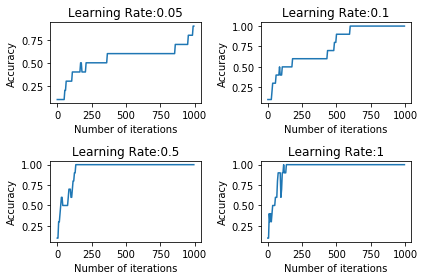

In [61]:
def test_LearnRate(Learning_rate,inputs,targets):
    nn=NeuralNetwork(learning_rate=Learning_rate)
    nn.fit(inputs,targets)
    acc_array=np.array(nn.acc_list)
    plt.plot(np.arange(acc_array.shape[0])*5,acc_array)
    plt.title("Learning Rate:{}".format(Learning_rate))
    plt.ylabel("Accuracy")
    plt.xlabel("Number of iterations")


plt.figure()
plt.subplot(2,2,1)
Learning_rate=0.05
test_LearnRate(Learning_rate,inputs,targets)

plt.subplot(2,2,2)
Learning_rate=0.1
test_LearnRate(Learning_rate,inputs,targets)

plt.subplot(2,2,3)
Learning_rate=0.5
test_LearnRate(Learning_rate,inputs,targets)

plt.subplot(2,2,4)
Learning_rate=1
test_LearnRate(Learning_rate,inputs,targets)
plt.tight_layout()
plt.show()